<a href="https://colab.research.google.com/github/clayozuna/tamu_datathon/blob/master/Main_File_4_Machine_Learning_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 4: Model Fitting (Linear Regression)

![alt text](https://revsearch-assets.s3.amazonaws.com/images/ds_process2.png)

## Learning Objectives:
* What is a model? What makes a model linear?
* Fit your own model by hand!
* A visual introduction to optimization - "What is a Loss Function?"
* How to train a linear model using the Scikit Learn library
* An introduction to neural networks
* How to interpret a linear regression model
* Understand the interpretability <> accuracy tradeoff

## Definitions
* **Accuracy** - How close to the true value the computer can predict.
* **Interpretability** - How well we can explain why the computer made the decision it did.
* **Machine Learning (ML)** - Computer makes decisions *using the data*. i.e. the computer algorithm is clueless before looking at the data, then it becomes smart after looking at the data.
* **Machine Learning <> Artificial Intelligence** - Learned rules (based on data) <> hard coded rules, set by the programmer.
* **Multilinear regression** - Using more than one feature to predict our target. 
* **Linear combination** - An addition of our parameters. i.e. $y = 3x + 9z$.
* **Multicollinearity** - When our features are highly correlated with eachother.

## A (Linear) Model

To start off, we'll be trying to draw a line through our data points denoted by this formula for a line. This formula for the line is called a model.

$$
\hat{y} = w * x + b
$$

Simply, a model is a function that aims to take our features ($x$) as input and output our prediction for the target ($\hat{y}$). The carrot above the y is called a *hat* and is used to denote  our prediction/aprozimation of the $y$ in our data, i.e. $\hat{y}\approx y$.

* **Data**
  * **Target Variable:** ($\hat{y}$) This is the variable that you're trying to predict given other values. This is also called the _response_ / _predicted_ / _dependent_ / _label_ variable.
  * **Feature Variable:** ($x$)  These are the variables that we use to predict the value of the target. These are also called _explanatory_ / _predictor_ / _feature_ / _signal_ / _independent_ variables. 
* **Parameters** - Variables that the computer will adjust to get a better score.
  * **Coefficient**: ($w$) What we multiply our features by. In neural networks and ML, we call $w$ the _weight_.
  * **Intercept**: ($b$) What $y$ equals when $x$ is 0. In neural networks and ML we call $b$ the bias.

## Model Fitting?

* **Fit** - $w=?$, $b=?$ - The process of picking the right parameters for our model to achieve the lowest loss.

* **Loss**
  - for the computer to find the **best parameters values**
  - easily differentiable
  - always positive value
  - computers goal is to minimize this function by adjusting the parameters
  - example: OLS - Ordinary least squares
  $$ℒ(w, b) := \frac{1}{2}\sum_{i=1}^n (y_i-\hat{y}_i)^2=\frac{1}{2}\sum_{i=1}^n (y_i-(wx_i+b))^2$$
* **Score (or Evaluation Metric)** - How we report the model's performance in learning our data.
  - interpretable
  - used to compare and choose the **best model**
  - example: For linear regression, $R^2$.
  $$R^2 = 1 - \frac{SSE}{SSR}$$
  where $SSE:=\sum_{i=1}^n (y_i-\hat{y}_i)^2$, $SSR:=\sum_{i=1}^n (y_i-\bar{y}_i)^2$

</br>
The best possible score for $R^2$ is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the mean value of y, disregarding the input features, would get a R^2 score of 0.0.
Roughly, if the $R^2$ of a model is 0.50, then approximately half of the observed variation can be explained by the model's inputs.

Notice $y$ and $x$ are data, not parameters. They are set. We are given them, we can't chose them. We can only choose our parameters.

### Fit a model by hand!

Below, we are going to try our own hand at fitting a model (line) to some dummy data. You will do this by adjusting the parameters ($b$, $w$) by hand. You don't have to understand all the code below.

In [0]:
# The 'as' keyword just renames the library, making it easier for us to access it
import pandas as pd
import numpy as np
# seed the random generator to get consistent results
np.random.seed(0)
import seaborn as sns
from matplotlib import pyplot as plt
# Our score function. More explained later.
from sklearn.metrics import r2_score

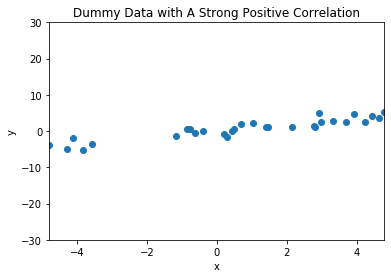

In [0]:
# @title Plot dummy data on scatterplot
w_true = 1
b_true = 0
w_min, w_max = -10, 11
b_min, b_max = -30, 30
w_range = np.linspace(w_min, w_max, 100)
b_range = np.linspace(b_min, b_max, 100)
# Generate some dummy data
def dummy_data():
  x = np.sort(np.random.uniform(-5, 5, size=30))
  y_hat = w_true*x+b_true
  y = np.random.normal(y_hat)
  return x, y
x, y = dummy_data()

plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.ylim(b_min, b_max)
plt.xlim(min(x), max(x))
plt.title("Dummy Data with A Strong Positive Correlation")
plt.show()

In [0]:
#@title Setup

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from mpl_toolkits import mplot3d

import plotly.graph_objects as go
import numpy as np
from plotly.subplots import make_subplots

def loss(w, b):
  y_hat = w*x+b
  return ((y-y_hat)**2).sum()

def plot_loss(w, b, ax):
  X, Y = np.meshgrid(w_range, b_range)
  Z = np.array([[loss(w, b) for w in w_range] for b in b_range])
  # ax = plt.axes(projection='3d')
  ax.plot_surface(X, Y, Z, cmap='viridis', alpha=.3)
  ax.scatter3D([w], [b], [loss(w, b)])
  # ax.plot3D([w]*len(w_range), b_range, b_gradient(w), 'gray')
  # ax.plot3D(w_range, [b] * len(b_range), w_gradient(b), 'gray')
  ax.text(w, b, loss(w, b), "({},{}), Loss: {:.0f}".format(w, b, loss(w, b)))
  ax.set_title("Computer's Brain: Minimize the Loss")
  ax.set_xlabel('w')
  ax.set_ylabel('b')
  ax.set_zlabel('loss')


def plot_model(w, b, ax=None):
    ax = ax or plt.subplot()
    x, y = dummy_data()
    ax.scatter(x, y, label="Data")
    ax.set_ylim(b_min, b_max)
    ax.set_xlim(min(x), max(x))
    model = w*x+b
    ax.plot(x, model, color="r", label='Model: $\hat{{y}}$={:.2f}*x+{:.0f}'.format(w, b))
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend(loc='upper left')
    ax.set_title('Fit Model To Data: ($R^2$: {:.2f})'.format(r2_score(y, model)))

def plot(w, b):
  fig = plt.figure(figsize=(15, 6))
  ax1 = plt.subplot(121, projection='3d')
  ax2 = plt.subplot(122)
  plot_loss(w, b, ax1)
  plot_model(w, b, ax2)
  

X, Y = np.meshgrid(w_range, b_range)
Z = np.array([[loss(w, b) for w in w_range] for b in b_range])

print("Setup Complete! 🎉")

Setup Complete! 🎉


In [0]:
#@title Plotting Loss
import plotly.graph_objects as go

hovertemplate = (
  "Loss: %{z:.0f}<br>"
  "w: %{x:.0f}<br>"
  "b: %{y:.0f}<br>"
  "<extra></extra>"
)
surface = go.Surface(
    x=X,
    y=Y,
    z=Z,
    hovertemplate=hovertemplate
)
layout = go.Layout(
    scene={
        'xaxis': {'title': 'w'},
        'yaxis': {'title': 'b'},
        'zaxis': {'title': 'loss'}
    },
    title='Loss, L(w, b), a function of parameters',
    autosize=False,
    scene_camera_eye=dict(x=1.87, y=0.88, z=-0.64),
    width=500, height=500,
    margin=dict(l=65, r=50, b=65, t=90)
)
fig = go.Figure(
    data=[surface],
    layout=layout
)
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))

fig.show()
# fig = make_subplots(rows=1, cols=2,
#                     specs=[[{'is_3d': True}, {'is_3d': False}]],
#                     print_grid=False)

# fig.append_trace(go.Surface(x=X, y=Y, z=Z), row=1, col=1)
# fig.append_trace(go.Scatter(x=x, y=y, mode='markers'), row=1, col=2)

In [0]:
# @title Run this block to vizualize model fitting
# You may have to run this cell a few times to get the plot to show
interact(
  plot,
  w = widgets.IntSlider(value=-10, min=w_min, max=w_max, step=1),
  b = widgets.IntSlider(value=-25, min=b_min, max=b_max, step=1)
)
print("Adjust the parameters: w and b to fit the model to the data!")
plt.show()

interactive(children=(IntSlider(value=-10, description='w', max=11, min=-10), IntSlider(value=-25, description…

Adjust the parameters: w and b to fit the model to the data!


### Use Math to Fit Model

We can actually get the computer to do what we just did for us! We  do this using math. Our goal through the math is to get the lowest loss possible, i.e. "move the ball to the bottom of the bowl". This is called optimization. In the case of linear regression, this "moving of the ball" is called convex optimization and can be solved using simple derivatives. However, we won't cover that here. We will use a package to do the math for us. Pay attention to the parameters the model picked.

We will be using Scikit-Learn's LinearRegression class to do the math for us. Learn more about it [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).



In [0]:
from sklearn.linear_model import LinearRegression
# this makes our x values a column of x values (instead of a row)
X = x.reshape(-1, 1)
# this is the magic line!
model = LinearRegression().fit(X, y)
y_hat = model.predict(X)

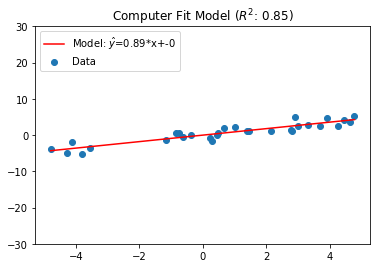

In [0]:
# Plot the original data and the line from our model.
plt.scatter(x, y, label='Data')
plt.plot(x, y_hat, 'r', label='Model: $\hat{{y}}$={:.2f}*x+{:.0f}'.format(model.coef_[0], model.intercept_))
# Set location of the legend of the plot.
plt.legend(loc='upper left')
plt.ylim(b_min, b_max)
plt.title("Computer Fit Model ($R^2$: {:.2f})".format(r2_score(y, y_hat)))
plt.show()

## Your First Neural Network!

Neural nets are the king of models when it comes to unstructured data, i.e. pictures, videos, natural language, etc. This is because of their ability to learn very complex relationships in the data. The field of ML that studies NN more closely is called *deep learning* and is a hot field.

Would you believe me if I told you you just made your first neural network model? Well you did! The figure below is what you'll generally see when people show neural networks.
- The circles are called **nodes**.
- The lines are **edges**. Notice how the edges are **weighted** with the parameters. 
- The figure can be thought of in terms of its sections of vertically aligned nodes, called **layers**. This network has 2 layers.
- The left-most layer is called the **input layer**. The input layer is where we feed in the features, one feature per node.
- The rightmost layer is called the **output layer** and is the node(s) that outputs our target.
- So how you read the figure is that the output node node is doing the simple computation of multiplying each feature (input node) by its corresponding parameter (edge weight) and summing all of those multiplications together. i.e. $\sum{\theta_ix_i}$ where $\theta_i$ is the $i^{th}$ parameter and $x_i$ is the $i^{th}$ input node.
- For those that are have seen this type of thing before, we are going to leave discussions of activation functions, output functions and hidden layers to later. But in case you were wondering, we could say this network is using the identity function as the activation function.

In [0]:
# @title Setup for plotting
# import library for drawing graph
import networkx as nx

def draw_nn(w, b, ax):
  y_label = f'$\hat{{y}}$={w}*x\n+{b}*1'
  G = nx.DiGraph()
  G.add_edges_from([('1', y_label)], weight=b)
  G.add_edges_from([('x', y_label)], weight=w)

  edge_labels={('x', y_label): f'w = {w}', ('1', y_label): f'b = {b}'}

  pos = {'x': (0, 1), '1': (0, 0), y_label: (1, 1)}
  edges = G.edges()
  weights = [G[u][v]['weight'] for u,v in edges]
  # truncate so arrow doesn't get too fat
  weights = [min(abs(w), 10) for w in weights]

  nx.draw_networkx_nodes(G, pos, node_color='w', node_size=5000, edgecolors='k', ax=ax)
  nx.draw_networkx_labels(G, pos, ax=ax)
  nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels, ax=ax)
  nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='k', arrows=True, node_size=5000, arrowsize=30, width=weights, ax=ax)

def plot(w, b):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
  plot_model(w, b, ax1)
  draw_nn(w, b, ax2)

In [0]:
# @title Run this block to vizualize your first neural network
# You may have to run this cell a few times to get the plot to show
interact(
  plot,
  w = widgets.IntSlider(value=-9, min=w_min, max=w_max, step=1),
  b = widgets.IntSlider(value=25, min=b_min, max=b_max, step=1)
)
print("Adjust the parameters: w and b to fit the model to the data!")
plt.show()

interactive(children=(IntSlider(value=-9, description='w', max=11, min=-10), IntSlider(value=25, description='…

Adjust the parameters: w and b to fit the model to the data!


See in the above visualization how your input layer (nodes on the left) consist of your data input ($x$) and the dummy input (1). These get multiplied by your parameters along the edges ($w$, $b$) to get a predicted value ($\hat{y}$) in the output node. If you set a parameter to 0, you essentially turn off that input.

### Growing to more complex models
 - including more factors
 - nonlinear relationships


In [0]:
import seaborn as sns
sns.get_dataset_names()
cars = sns.load_dataset('mpg')
cars = cars.dropna()
cars.head()

/usr/local/lib/python3.6/dist-packages/seaborn/utils.py:384: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 384 of the file /usr/local/lib/python3.6/dist-packages/seaborn/utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.




,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [0]:
import plotly.express as px
fig = px.scatter_3d(cars, x='horsepower', y='weight', z='mpg',
              color='origin', size='acceleration', size_max=18,
              symbol='cylinders', opacity=0.7, hover_name='name')

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

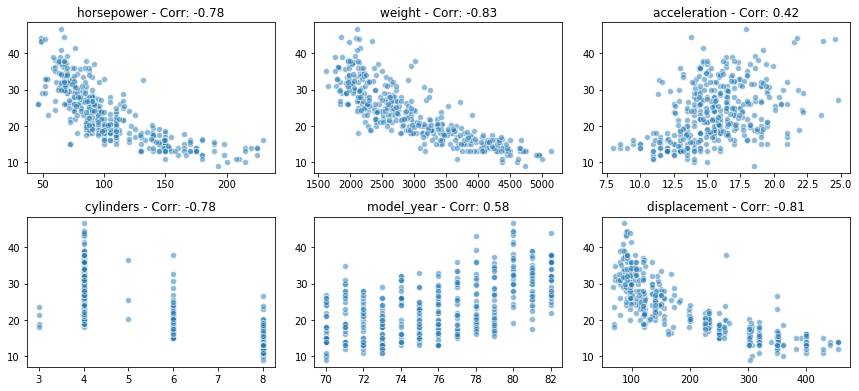

In [0]:
plt.figure(figsize=(12, 8))
feature_names = ['horsepower', 'weight', 'acceleration', 'cylinders', 'model_year', 'displacement']
for i, col in enumerate(feature_names, 1):
  plt.subplot(3, 3, i)
  plt.scatter(cars[col], cars.mpg, edgecolors='w', alpha=.5)
  plt.title(col + " - Corr: {:.2f}".format(cars.corr().mpg[col]))
plt.tight_layout()

In [0]:
features = cars[['weight', 'horsepower']] 
target = cars['mpg']
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(features, target)
predictions = model.predict(features)

In [0]:
xmin, xmax = min(cars.weight), max(cars.weight)
xlim = (xmin, xmax)
ymin, ymax = min(cars.horsepower), max(cars.horsepower)
ylim = (ymin, ymax)
data = [[xmin, ymin], [xmin, ymax], [xmax, ymin], [xmax, ymax]]
surface_pts = model.predict(data)

In [0]:
# @title Plot Multivariate Regression
# use math to fit model
import plotly.graph_objects as go
surface = go.Surface(x=xlim, y=ylim, z=surface_pts.reshape(2, 2), hoverinfo='skip', opacity=.6)

hovertemplate = (
  "Horsepower: %{y:.0}<br>"
  "Weight: %{x:.0}<br>"
  "Predicted mpg: %{z:.0}<br>"
  "Actual mpg: %{text:.0}"
  "<extra></extra>"
)

errors = np.abs(predictions - cars.mpg)
maxe = max(errors)


scatter = go.Scatter3d(
    x=cars.weight,
    y=cars.horsepower,
    z=cars.mpg,
    mode='markers',
    hovertemplate=hovertemplate,
    text=predictions.round(),
    marker={'color': errors, 'colorscale': 'Viridis', 'size': 5, 'opacity': .9}
)
layout = go.Layout(
    scene={
        'xaxis': {'title': 'weight'},
        'yaxis': {'title': 'horsepower'},
        'zaxis': {'title': 'predicted mpg'}
    },
    title='Model: mpg={:.4f}*weight+{:.4f}*horsepower+{:.1f}'.format(*model.coef_, model.intercept_)
)
fig = go.Figure(
    data=[scatter, surface],
    layout=layout
)
fig.show()

### Neural Networks - Multifeatures

We now have a model with two features! Let see how this would look like in a neural network.

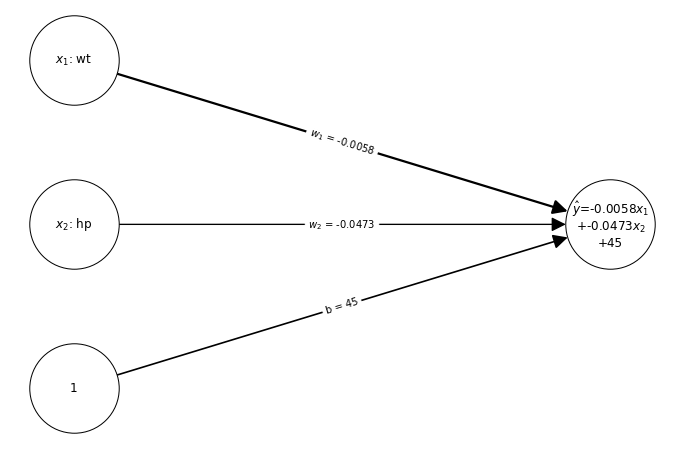

In [0]:
# @title Plot Multivariate Neural Network
import networkx as nx

def draw_nn(w1, w2, b):
  fig =  plt.figure(figsize=(12,8))
  y_label = f'$\hat{{y}}$={w1}$x_1$\n+{w2}$x_2$\n+{b}'
  G = nx.DiGraph()
  x1_label = '$x_1$: wt'
  x2_label = '$x_2$: hp'
  G.add_edges_from([('1', y_label)], weight=b)
  G.add_edges_from([(x1_label, y_label)], weight=w1)
  G.add_edges_from([(x2_label, y_label)], weight=w2)

  edge_labels={(x1_label, y_label): f'$w_1$ = {w1}',
               (x2_label, y_label): f'$w_2$ = {w2}',
               ('1', y_label): f'b = {b}'}

  pos = {x1_label: (0, .5), x2_label: (0, 0), '1': (0, -.5), y_label: (1, 0)}
  edges = G.edges()
  weights = [np.log10(abs(G[u][v]['weight'])) for u,v in edges]
  # truncate so arrow doesn't get too fat
  weights = [min(abs(w), 10) for w in weights]

  nx.draw_networkx_nodes(G, pos, node_color='w', node_size=8000, edgecolors='k')
  nx.draw_networkx_labels(G, pos)
  nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
  nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='k', arrows=True, node_size=8000, arrowsize=30, width=weights)
  plt.box(False)
draw_nn(*[round(x, 4) for x in model.coef_], int(model.intercept_))

## Interpretability <> Accuracy Tradeoff

We start with linear regression because it is the most **interpretable** method, meaning we can explain very well *why* our machine learning model is predicting what it is, since we can easily look at the cooefficents to read the impact each feature is making on the prediction of the target. For ecample, our multilinear regression model had the form:
$$mpg = -.0058*weight - .0473*horsepower+45.6$$
Roughly meaning that, horsepower held constant, a **one pound increase** in weight results in a **-.0058 decrease in mpg** and a weight held constant, a **one unit increase** in horsepower results in a **-.0.473 decrease in mpg**, and that a theoretical car with no horsepower or weight would have 45.6 mpg.

(Side note, if we ran a few more stats, we could also know how confidently we should trust it's predictions.)

As we move to more complex models, it becomes harder and harder to interpret our results.

For example, our play neural network with one hidden layer is an equation of the form: $$mpg = relu(-.0058*weight - 10)$$
has a more harder time being interpreted, although it may be more accurate.

The following chart shows a progression on from interpretable to accurate.

<img src="https://miro.medium.com/max/1400/1*shNOspLyVn_2mvwves9MMA.png" alt="alt" width="600"/>

1. Import the tips dataset from seaborn
2. Fit a linear regression model using sklearn and retrieve the coeficient, intercept and $R^2$. Use them to answer the question below.
3. Smoker being held constant, a \\$1 increase in the bill has an average of a **???** increase in tip.
Total bill being constant, being a smoker results in an average of a **???** decrease in tip. Finally, a \\$0 bill for a non smoker is expected to produce a tip of **???**.
4. Using *smoker* and *total bill* accounts for **???** of the variation in tip given.

In [0]:
from sklearn.linear_model import LinearRegression
tips = sns.load_dataset('tips')
tips["smoker1"] = (tips.smoker == 'Yes').astype(int)
tips["interact"] = tips["smoker1"] * tips["total_bill"]
features = tips[['smoker1', 'total_bill', 'interact']]
target = tips.tip
mod = LinearRegression().fit(features, target)
print(mod.coef_)
print(mod.intercept_)
print(f"tip={round(mod.coef_[0], 2)}*smoker+{round(mod.coef_[1], 2)}*total_bill+{round(mod.coef_[1], 3)}*(total_bill*smoker)+{round(mod.intercept_, 2)}")

[ 1.20420273  0.1371559  -0.0675657 ]
0.3600687367471038
tip=1.2*smoker+0.14*total_bill+0.137*(total_bill*smoker)+0.36


In [0]:
import plotly.express as px
px.scatter(tips, 'total_bill', 'tip', color='smoker', trendline='ols') # lowess

Rodney knows his favorite customer (who is not a smoker) is coming in on Friday and always buys the same thing, a burger, fries and drink for \$30. Rodney wants to know if he can expect a big enough tip to rent a redbox for \$4 on the way home. Use your model to answer this question for Rodney.

In [0]:
# print(mod.score(features, target))
preds = mod.predict(features)
rmse = lambda y, pred: np.sqrt(np.mean((y-pred)**2))
print(rmse(target, preds))
# print(mod.predict([[1, 30, 30]]))
print(mod.predict([[0, 30, 0]]))

0.9704853141620997
[4.47474575]


In [0]:
import plotly.express as px
px.scatter(tips, 'total_bill', 'tip', color='smoker', trendline='ols') #lowess

### Challenges:

- beginner: use the sklearn library to find the answers
- advanced: find the solution by hand (paper/pencil)

Consider the following data:
- x = 1, 2, 3
- y = 4, 5, 6

I. Plot the data by hand
1. draw a line through the data
2. hypothesise about what the w and b parameters might be
3. Force b to be 0. Hypothesise about what the w parameter might be now.

II. Fit a line to the data using linear regression w/o an intercept (i.e. b=0)
1. Write the objective function for the loss, i.e. $ℒ(w)=?$
2. Take the derivative of ℒ
3. Calculate $ℒ'(w)$ using the above data
4. Set it equal to 0
5. Solve to find $w$

III. Fit a line to the data using linear regression
1. Write the objective function for the loss, i.e. $ℒ(w, b)=?$
2. Differentiate ℒ with respect to $w$ and $b$
3. Calculate $\frac{∂ℒ}{∂w}$ and $\frac{∂ℒ}{∂b}$ using the above data
4. Set both formulas equal to 0
5. Solve the system of equations to find $w$ and $b$

In [0]:
#@title Challenge Setup

import binascii
#binascii.b2a_hex(b"input")
def check(answer, truth, label=''):
  decode = lambda s: binascii.unhexlify(s.encode()).decode()
  if answer == '':
    print(f'Please answer the question{" for " if label else ""}{label}. 🤓')
  elif answer == decode(truth):
    print(f'{label}{" - " if label else ""}Correct! 🤩')
  else:
    print(f'{label}{" - " if label else ""}Incorrect 😞')

print("Setup Complete! 🎉")

Setup Complete! 🎉


In [0]:
#@title Question II
#@markdown Round all answers to four decimal places
w = '' #@param {type:"string"}
check(w, '322e31343239')

Please answer the question. 🤓


In [0]:
#@title Question III
#@markdown Round all answers to four decimal places
w = '' #@param {type:"string"}
b = '' #@param {type:"string"}
check(str(w), '312e30303030', 'w')
check(str(b), '322e36363637', 'b')

Please answer the question for w. 🤓
Please answer the question for b. 🤓


### Project Work

- fit a linear regression to your data
- if your chosen target variable is catagorical, see if you can choose a different target variable just for this for sake of learning
- plot each feature variable against your target variable, see if the relationships seem reasonably linear
- report the coefficient(s) and intercept of your model, and interpret
- report the R^2 from your model, and interpret